# 客户流失项目

## 调包

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import TransactionEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

from sklearn.decomposition import PCA

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

In [2]:
import pandas as pd
import numpy as np

## 导入数据

In [3]:
df = pd.read_csv('userlostprob.txt',sep='\t')

In [4]:
df = pd.DataFrame(df,index=None)
df.shape
df.describe()
df.info()
df.isnull().sum()

(689945, 51)

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
count,689945.000000,6.899450e+05,689945.000000,385450.000000,82915.000000,386525.000000,689148.000000,447831.000000,661312.000000,447831.000000,...,660664.000000,447831.000000,602960.000000,682274.000000,651263.000000,592818.000000,457896.000000,689945.000000,5.929100e+05,689945.000000
mean,0.274452,6.285402e+05,0.193737,5.317048,1.856094,11.710487,1.060996,0.342119,6.086366,154.179369,...,318.541812,101830.919400,0.368237,10.648278,2.253250,12049.409382,1.137476,153.702414,1.855185e+04,14.462315
std,0.446238,4.146815e+05,0.395226,38.524483,2.103862,17.251429,0.045264,0.354210,12.413225,398.456986,...,351.913035,122784.313864,0.219945,15.696682,3.538453,25601.374138,0.204789,277.807697,2.288603e+05,6.301575
min,0.000000,2.463600e+04,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.007000,0.007000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,0.000000,3.123200e+05,0.000000,2.000000,1.000000,2.000000,1.030000,0.000000,0.000000,0.000000,...,145.000000,14999.000000,0.170000,0.827000,0.127000,551.000000,1.000000,17.000000,4.710000e+02,11.000000
50%,0.000000,5.996370e+05,0.000000,3.000000,1.000000,6.000000,1.050000,0.250000,0.000000,2.000000,...,233.000000,46890.000000,0.400000,3.527000,0.627000,2848.000000,1.050000,62.000000,1.315000e+03,15.000000
75%,1.000000,8.874600e+05,0.000000,5.000000,2.000000,14.000000,1.090000,0.570000,4.000000,153.000000,...,388.000000,138953.000000,0.550000,13.327000,2.747000,10726.000000,1.210000,180.000000,3.141000e+03,20.000000
max,1.000000,2.238426e+06,1.000000,3167.000000,106.000000,711.000000,3.180000,1.000000,49.000000,13475.000000,...,43700.000000,527026.000000,0.990000,67.140000,14.507000,194386.000000,11.000000,9956.000000,9.651192e+06,23.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
label                               689945 non-null int64
sampleid                            689945 non-null int64
d                                   689945 non-null object
arrival                             689945 non-null object
iforderpv_24h                       689945 non-null int64
decisionhabit_user                  385450 non-null float64
historyvisit_7ordernum              82915 non-null float64
historyvisit_totalordernum          386525 non-null float64
hotelcr                             689148 non-null float64
ordercanceledprecent                447831 non-null float64
landhalfhours                       661312 non-null float64
ordercanncelednum                   447831 non-null float64
commentnums                         622029 non-null float64
starprefer                          464892 non-null float64
novoters                            672918 non-null float6

label                                    0
sampleid                                 0
d                                        0
arrival                                  0
iforderpv_24h                            0
decisionhabit_user                  304495
historyvisit_7ordernum              607030
historyvisit_totalordernum          303420
hotelcr                                797
ordercanceledprecent                242114
landhalfhours                        28633
ordercanncelednum                   242114
commentnums                          67916
starprefer                          225053
novoters                             17027
consuming_capacity                  226108
historyvisit_avghotelnum            302069
cancelrate                           11718
historyvisit_visit_detailpagenum    382711
delta_price1                        252799
price_sensitive                     226108
hoteluv                                797
businessrate_pre                    206049
ordernum_on

# 数据探索

## 将字段名转换为中文

In [5]:
translation = pd.read_excel('字段说明.xlsx')
df_trans = pd.DataFrame(translation)
df_trans.shape

(51, 3)

In [6]:
np.setxor1d(df.columns,df_trans.字段)
# 没有缺失或名称错误字段

array([], dtype=object)

In [7]:
def feature_translation(x):
    dic={k:v for k,v in df_trans[["字段","解释"]].values.reshape(51,2)}
    y=x.copy()
    y.columns=pd.Series(y.columns).map(dic)
    return y

df = feature_translation(df)
df.head()

,目标变量,样本id,访问日期,入住日期,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近7天用户历史订单数,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,昨日提交当前城市同入住日期的app订单数,一年内距上次访问时长,用户转化率,会话id，sid=1可认为是新访,年访问次数,访问时间点
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [8]:
df.columns

Index(['目标变量', '样本id', '访问日期', '入住日期', '24小时内是否访问订单填写页', '决策习惯：以用户为单位观察决策习惯',
       '近7天用户历史订单数', '近1年用户历史订单数', '当前酒店历史cr', '用户一年内取消订单率', '24小时内登陆时长',
       '用户一年内取消订单数', '当前酒店点评数', '星级偏好', '当前酒店评分人数', '消费能力指数',
       '近3个月用户历史日均访问酒店数', '当前酒店历史取消率', '7天内访问酒店详情页数', '用户偏好价格-24小时浏览最多酒店价格',
       '价格敏感指数', '当前酒店历史uv', '24小时历史浏览次数最多酒店商务属性指数', '用户年订单数',
       '24小时历史浏览次数最多酒店历史cr', '平均价格', '当前酒店可定最低价', '首单bu', '24小时历史浏览酒店客户评分均值',
       '用户偏好价格-24小时浏览酒店平均价格', '24小时历史浏览次数最多酒店点评数', '客户价值_近1年',
       '24小时历史浏览酒店点评数均值', '24小时内已访问次数最多酒店历史取消率', '24小时历史浏览酒店评分人数均值',
       '24小时历史浏览次数最多酒店评分人数', '客户价值', '24小时内已访问酒店价格与对手价差均值，t+1',
       '24小时内已访问次数最多酒店可订最低价', '24小时历史浏览次数最多酒店历史uv', '24小时历史浏览酒店历史uv均值',
       '24小时内已访问酒店可订最低价均值', '一年内距离上次下单时长', '24小时内已访问酒店商务属性指数均值',
       '昨日访问当前城市同入住日期的app uv数', '昨日提交当前城市同入住日期的app订单数', '一年内距上次访问时长', '用户转化率',
       '会话id，sid=1可认为是新访', '年访问次数', '访问时间点'],
      dtype='object')

In [9]:
len(df.isnull().sum()[df.isnull().sum() != 0])

44

## 查看有监督模型的目标变量是否偏斜

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x1e4c06c2d08>,
 <a list of 2 Text xticklabel objects>)

2.6436202516938905

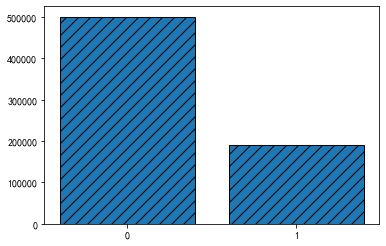

In [10]:
plt.bar([0,1],df.目标变量.value_counts(),edgecolor='k',hatch='//')
plt.xticks([0,1])
df.目标变量.value_counts()[0]/df.目标变量.value_counts()[1]
# 分类比大致2.6:1，暂时可以接受，建造模型时再判断是否需要重采样

In [11]:
# 查看数据是否有重复记录（重复id）
df.样本id.nunique() == df.shape[0]

True

## 判断缺失值字段是否删除

In [12]:
mnull = df.isnull().mean()>0.5 #设0.5位阈值，缺失超过50%的字段删除
sum(mnull)

2

In [13]:
mnull = df.isnull().mean()>0.5
df_0 = df.loc[:,~mnull]
df_0.shape

(689945, 49)

In [14]:
df_0.head()

,目标变量,样本id,访问日期,入住日期,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,昨日提交当前城市同入住日期的app订单数,一年内距上次访问时长,用户转化率,会话id，sid=1可认为是新访,年访问次数,访问时间点
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,1.04,NaN,22.0,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,1.06,NaN,0.0,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,1.05,NaN,3.0,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,1.01,NaN,2.0,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,1.00,NaN,0.0,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


## 字段分类对比

### 新老客户占比

In [15]:
new_percent = (df_0['会话id，sid=1可认为是新访']==1).sum()/df_0.shape[0]
percent = [new_percent,1-new_percent]

([<matplotlib.patches.Wedge at 0x1e4be694848>,
 [Text(1.1816069618097662, 0.20929641134690688, '新访客户'),
  Text(-1.0831397172376316, -0.1918550310583072, '老客户')],
 [Text(0.6892707277223636, 0.12208957328569568, '5.58%'),
  Text(-0.5908034821296171, -0.10464819875907665, '94.42%')])

Text(0.5, 1.0, '新老客户占比')

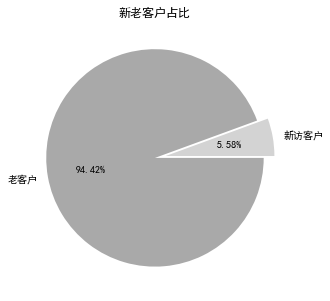

In [16]:
fig = plt.figure(figsize=(8,5))
plt.pie(percent,autopct='%.2f%%',labels=['新访客户','老客户'],colors=['lightgrey','darkgrey'],explode=[0.1,0])
plt.title('新老客户占比')

### 访问日期与入住日期的先后关系

In [17]:
lista = []
for i in sorted(df_0['访问日期'].unique()):
    lista.append((df_0['访问日期']==i).value_counts()[1])
print(lista)

listb = []
for j in sorted(df_0['入住日期'].unique()):
    listb.append((df_0['入住日期']==j).value_counts()[1])
print(listb)

[96894, 98378, 93105, 101208, 108225, 111985, 80150]
[47850, 57772, 61417, 68052, 75067, 110982, 95820, 18743, 15567, 10731, 8785, 7923, 12419, 11761, 3697, 3707, 3505, 3569, 3938, 5246, 5871, 3304, 3871, 3564, 10197, 18120, 4979, 2350, 1815, 1985, 1458, 1657, 1225, 1408, 1038, 358, 194]


([<matplotlib.axis.XTick at 0x1e4be6c2748>,
 <a list of 8 Text xticklabel objects>)

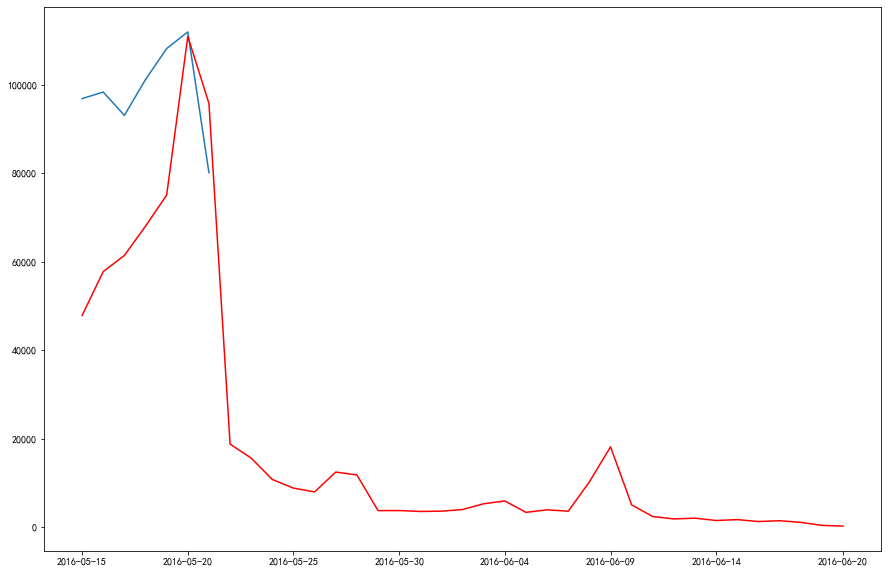

In [18]:
fig = plt.figure(figsize=(15,10))
plt.plot(sorted(df_0['访问日期'].unique()),lista)
plt.plot(sorted(df_0['入住日期'].unique()),listb,c='r')
plt.xticks(['2016-05-15','2016-05-20','2016-05-25','2016-05-30','2016-06-04','2016-06-09','2016-06-14','2016-06-20'])

### 酒店转化率相似字段

<Figure size 1296x360 with 0 Axes>

(array([5.84670e+05, 1.00828e+05, 3.25100e+03, 2.40000e+02, 7.50000e+01,
        1.10000e+01, 4.20000e+01, 7.00000e+00, 9.00000e+00, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 7.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([1.   , 1.109, 1.218, 1.327, 1.436, 1.545, 1.654, 1.763, 1.872,
        1.981, 2.09 , 2.199, 2.308, 2.417, 2.526, 2.635, 2.744, 2.853,
        2.962, 3.071, 3.18 ]),
 <a list of 20 Patch objects>)

([<matplotlib.axis.XTick at 0x1e4be58ee48>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, '当前酒店历史cr分布')

(array([5.22905e+05, 1.31318e+05, 5.84100e+03, 2.83000e+02, 8.70000e+01,
        5.50000e+01, 1.20000e+01, 3.30000e+01, 4.00000e+00, 4.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([1.    , 1.0975, 1.195 , 1.2925, 1.39  , 1.4875, 1.585 , 1.6825,
        1.78  , 1.8775, 1.975 , 2.0725, 2.17  , 2.2675, 2.365 , 2.4625,
        2.56  , 2.6575, 2.755 , 2.8525, 2.95  ]),
 <a list of 20 Patch objects>)

([<matplotlib.axis.XTick at 0x1e4be975ac8>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, '24小时历史浏览次数最多酒店历史cr分布')

(array([4.25969e+05, 2.49160e+04, 6.74300e+03, 4.00000e+01, 1.53000e+02,
        1.60000e+01, 4.00000e+01, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.00000e+00]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

([<matplotlib.axis.XTick at 0x1e4be9fb608>,
 <a list of 10 Text xticklabel objects>)

Text(0.5, 1.0, '用户转化率分布')

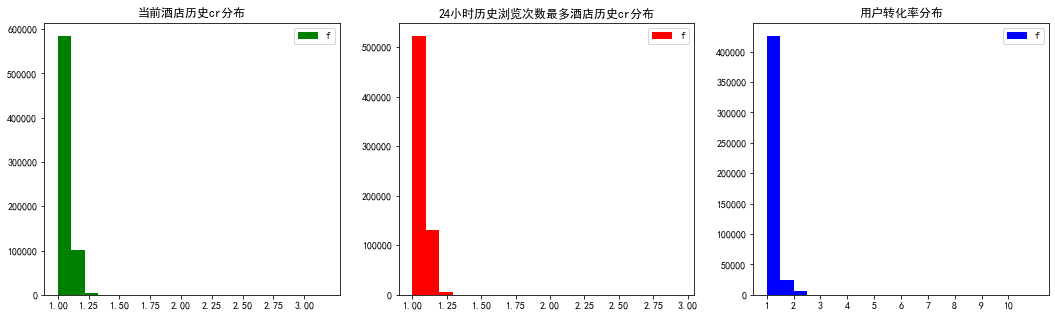

In [19]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df_0['当前酒店历史cr'].dropna(),bins=20,color='g')
plt.xticks([1,1.25,1.5,1.75,2,2.25,2.5,2.75,3])
plt.title('当前酒店历史cr分布')
plt.legend('freqency')

plt.subplot(132)
plt.hist(df_0['24小时历史浏览次数最多酒店历史cr'].dropna(),bins=20,color='r')
plt.xticks([1,1.25,1.5,1.75,2,2.25,2.5,2.75,3])
plt.title('24小时历史浏览次数最多酒店历史cr分布')
plt.legend('freqency')

plt.subplot(133)
plt.hist(df_0['用户转化率'].dropna(),bins=20,color='b')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title('用户转化率分布')
plt.legend('freqency')

In [20]:
df[['当前酒店历史cr','24小时历史浏览次数最多酒店历史cr','用户转化率']].corr()

,当前酒店历史cr,24小时历史浏览次数最多酒店历史cr,用户转化率
当前酒店历史cr,1.000000,0.455887,0.102181
24小时历史浏览次数最多酒店历史cr,0.455887,1.000000,0.104634
用户转化率,0.102181,0.104634,1.000000


### 订单取消相似字段

<Figure size 1296x360 with 0 Axes>

(array([170848.,   8916.,  13066.,   8965.,  13811.,  21336.,  24050.,
          8820.,  15459.,  10380.,  35318.,  12194.,   5706.,  14055.,
          4530.,   6538.,   5590.,   3496.,   7720.,  57033.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户一年内取消订单率')

(array([4.18766e+05, 2.01530e+04, 5.71300e+03, 1.77800e+03, 6.84000e+02,
        3.82000e+02, 1.03000e+02, 7.70000e+01, 4.60000e+01, 4.00000e+00,
        8.00000e+00, 6.30000e+01, 8.00000e+00, 3.00000e+00, 0.00000e+00,
        2.10000e+01, 0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+01]),
 array([    0.  ,   673.75,  1347.5 ,  2021.25,  2695.  ,  3368.75,
         4042.5 ,  4716.25,  5390.  ,  6063.75,  6737.5 ,  7411.25,
         8085.  ,  8758.75,  9432.5 , 10106.25, 10780.  , 11453.75,
        12127.5 , 12801.25, 13475.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户一年内取消订单数')

(array([  5580.,  17357.,  49339.,  48269.,  73448., 108188.,  85573.,
         61605.,  63904.,  42843.,  28719.,  19440.,   8184.,  10273.,
          4204.,   5039.,   4521.,   2722.,   2513.,  11294.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时内已访问次数最多酒店历史取消率')

(array([4.46616e+05, 1.13643e+05, 5.20570e+04, 2.81830e+04, 1.69910e+04,
        8.97000e+03, 6.33700e+03, 8.79000e+02, 1.36700e+03, 1.19200e+03,
        2.10000e+02, 1.44000e+02, 3.13000e+02, 4.62000e+02, 0.00000e+00,
        3.16000e+02, 0.00000e+00, 0.00000e+00, 1.01000e+02, 4.46000e+02]),
 array([1.000000e+00, 9.474500e+02, 1.893900e+03, 2.840350e+03,
        3.786800e+03, 4.733250e+03, 5.679700e+03, 6.626150e+03,
        7.572600e+03, 8.519050e+03, 9.465500e+03, 1.041195e+04,
        1.135840e+04, 1.230485e+04, 1.325130e+04, 1.419775e+04,
        1.514420e+04, 1.609065e+04, 1.703710e+04, 1.798355e+04,
        1.893000e+04]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店历史取消率')

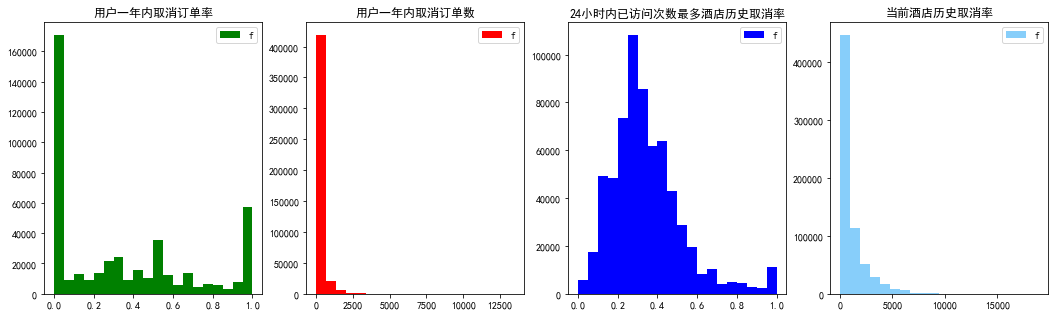

In [21]:
plt.figure(figsize=(18,5))

plt.subplot(141)
plt.hist(df_0['用户一年内取消订单率'].dropna(),bins=20,color='g')
plt.title('用户一年内取消订单率')
plt.legend('freqency')

plt.subplot(142)
plt.hist(df_0['用户一年内取消订单数'].dropna(),bins=20,color='r')
plt.title('用户一年内取消订单数')
plt.legend('freqency')

plt.subplot(143)
plt.hist(df_0['24小时内已访问次数最多酒店历史取消率'].dropna(),bins=20,color='b')
plt.title('24小时内已访问次数最多酒店历史取消率')
plt.legend('freqency')

plt.subplot(144)
plt.hist(df_0['当前酒店历史取消率'].dropna(),bins=20,color='lightskyblue')
plt.title('当前酒店历史取消率')
plt.legend('freqency')

In [22]:
df_0[['用户一年内取消订单率','用户一年内取消订单数','24小时内已访问次数最多酒店历史取消率','当前酒店历史取消率']].corr()

,用户一年内取消订单率,用户一年内取消订单数,24小时内已访问次数最多酒店历史取消率,当前酒店历史取消率
用户一年内取消订单率,1.000000,0.277654,0.036296,-0.021833
用户一年内取消订单数,0.277654,1.000000,-0.005915,0.008699
24小时内已访问次数最多酒店历史取消率,0.036296,-0.005915,1.000000,-0.195901
当前酒店历史取消率,-0.021833,0.008699,-0.195901,1.000000


#### 潜在高相关字段（一年内取消订单率vs一年内取消订单数）

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, '用户一年内取消订单率')

Text(0.5, 1.0, '用户一年内取消订单数')

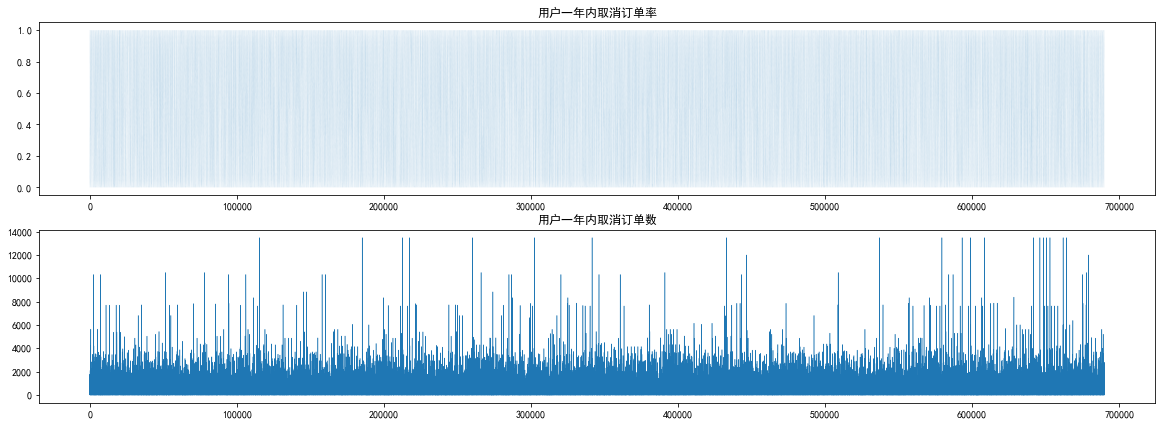

In [23]:
plt.figure(figsize=(20, 7))

plt.subplot(211)
plt.plot(df_0['用户一年内取消订单率'].dropna(),linewidth=0.01)
plt.title('用户一年内取消订单率')

plt.subplot(212)
plt.plot(df_0['用户一年内取消订单数'].dropna(),linewidth=0.5)
plt.title('用户一年内取消订单数')

In [24]:
df_0.用户一年内取消订单率.isnull().sum()
df_0.用户一年内取消订单数.isnull().sum()

242114

242114

<Figure size 864x576 with 0 Axes>

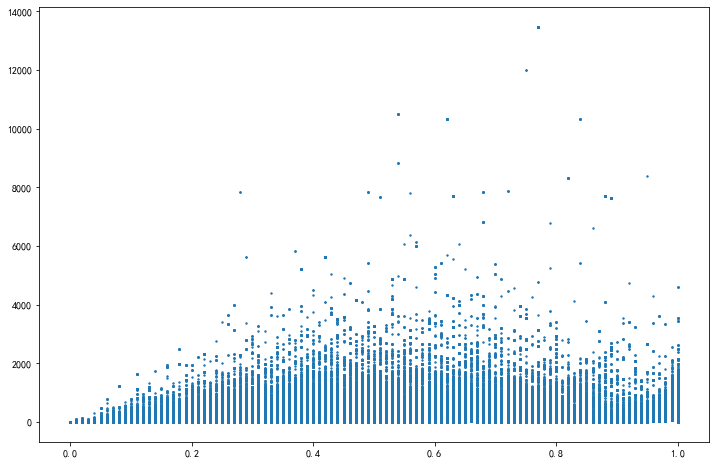

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['用户一年内取消订单率'].dropna(),df_0['用户一年内取消订单数'].dropna(),s=2)

In [26]:
# 结论：一年内取消率与一年内取消数无明显相关性

### 酒店点评数

<Figure size 1296x360 with 0 Axes>

(array([4.70406e+05, 9.22040e+04, 3.32380e+04, 1.39390e+04, 5.45300e+03,
        2.69100e+03, 9.70000e+02, 7.00000e+02, 1.14500e+03, 2.99000e+02,
        0.00000e+00, 0.00000e+00, 4.37000e+02, 1.01000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.46000e+02]),
 array([    0.  ,  1709.45,  3418.9 ,  5128.35,  6837.8 ,  8547.25,
        10256.7 , 11966.15, 13675.6 , 15385.05, 17094.5 , 18803.95,
        20513.4 , 22222.85, 23932.3 , 25641.75, 27351.2 , 29060.65,
        30770.1 , 32479.55, 34189.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店点评数')

(array([4.37647e+05, 9.40740e+04, 3.59110e+04, 1.61830e+04, 5.89300e+03,
        3.18000e+03, 1.07200e+03, 7.20000e+02, 2.01900e+03, 3.46000e+02,
        0.00000e+00, 0.00000e+00, 6.06000e+02, 1.55000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.62000e+02]),
 array([    0.  ,  1709.45,  3418.9 ,  5128.35,  6837.8 ,  8547.25,
        10256.7 , 11966.15, 13675.6 , 15385.05, 17094.5 , 18803.95,
        20513.4 , 22222.85, 23932.3 , 25641.75, 27351.2 , 29060.65,
        30770.1 , 32479.55, 34189.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览次数最多酒店点评数')

(array([4.78474e+05, 1.16469e+05, 3.53120e+04, 1.02380e+04, 3.45300e+03,
        1.71300e+03, 7.79000e+02, 4.76000e+02, 6.76000e+02, 2.57000e+02,
        1.26000e+02, 5.30000e+01, 1.81000e+02, 6.80000e+01, 3.70000e+01,
        1.80000e+01, 9.00000e+00, 4.00000e+00, 2.00000e+00, 1.12000e+02]),
 array([    0.  ,  1709.45,  3418.9 ,  5128.35,  6837.8 ,  8547.25,
        10256.7 , 11966.15, 13675.6 , 15385.05, 17094.5 , 18803.95,
        20513.4 , 22222.85, 23932.3 , 25641.75, 27351.2 , 29060.65,
        30770.1 , 32479.55, 34189.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览酒店点评数均值')

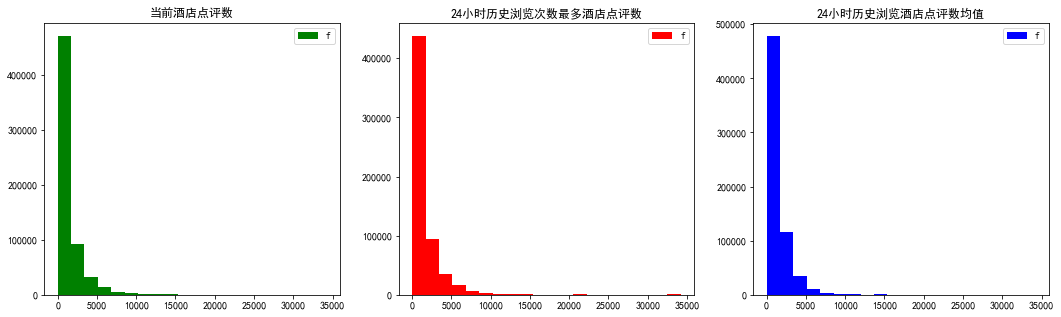

In [27]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df_0['当前酒店点评数'].dropna(),bins=20,color='g')
plt.title('当前酒店点评数')
plt.legend('freqency')

plt.subplot(132)
plt.hist(df_0['24小时历史浏览次数最多酒店点评数'].dropna(),bins=20,color='r')
plt.title('24小时历史浏览次数最多酒店点评数')
plt.legend('freqency')

plt.subplot(133)
plt.hist(df_0['24小时历史浏览酒店点评数均值'].dropna(),bins=20,color='b')
plt.title('24小时历史浏览酒店点评数均值')
plt.legend('freqency')

In [28]:
df_0[['当前酒店点评数','24小时历史浏览酒店点评数均值','24小时历史浏览次数最多酒店点评数']].corr()

,当前酒店点评数,24小时历史浏览酒店点评数均值,24小时历史浏览次数最多酒店点评数
当前酒店点评数,1.000000,0.466813,0.381434
24小时历史浏览酒店点评数均值,0.466813,1.000000,0.837862
24小时历史浏览次数最多酒店点评数,0.381434,0.837862,1.000000


In [29]:
# 存在高相关字段，后续进行处理

### 酒店历史uv

<Figure size 1296x360 with 0 Axes>

(array([4.80674e+05, 1.02448e+05, 4.57860e+04, 2.17740e+04, 1.27210e+04,
        7.67900e+03, 3.46800e+03, 3.20300e+03, 2.37500e+03, 1.15200e+03,
        8.18000e+02, 1.84200e+03, 1.51800e+03, 5.44000e+02, 4.48000e+02,
        5.14000e+02, 6.36000e+02, 5.34000e+02, 3.13000e+02, 7.01000e+02]),
 array([7.0000000e-03, 8.6137300e+01, 1.7226760e+02, 2.5839790e+02,
        3.4452820e+02, 4.3065850e+02, 5.1678880e+02, 6.0291910e+02,
        6.8904940e+02, 7.7517970e+02, 8.6131000e+02, 9.4744030e+02,
        1.0335706e+03, 1.1197009e+03, 1.2058312e+03, 1.2919615e+03,
        1.3780918e+03, 1.4642221e+03, 1.5503524e+03, 1.6364827e+03,
        1.7226130e+03]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店历史uv')

(array([439804., 102604.,  48952.,  24227.,  14266.,   9447.,   3964.,
          3476.,   2366.,   1936.,   1101.,   1786.,   1904.,    786.,
           706.,    459.,    554.,    597.,    826.,    787.]),
 array([7.0000000e-03, 8.6137300e+01, 1.7226760e+02, 2.5839790e+02,
        3.4452820e+02, 4.3065850e+02, 5.1678880e+02, 6.0291910e+02,
        6.8904940e+02, 7.7517970e+02, 8.6131000e+02, 9.4744030e+02,
        1.0335706e+03, 1.1197009e+03, 1.2058312e+03, 1.2919615e+03,
        1.3780918e+03, 1.4642221e+03, 1.5503524e+03, 1.6364827e+03,
        1.7226130e+03]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览次数最多酒店历史uv')

(array([4.26051e+05, 1.23490e+05, 5.36960e+04, 2.25120e+04, 1.07160e+04,
        6.81500e+03, 3.86800e+03, 3.00000e+03, 2.33100e+03, 2.18000e+03,
        1.52900e+03, 1.40400e+03, 1.32900e+03, 7.47000e+02, 5.63000e+02,
        2.72000e+02, 2.06000e+02, 1.53000e+02, 2.00000e+02, 1.27000e+02]),
 array([7.0000000e-03, 8.6137300e+01, 1.7226760e+02, 2.5839790e+02,
        3.4452820e+02, 4.3065850e+02, 5.1678880e+02, 6.0291910e+02,
        6.8904940e+02, 7.7517970e+02, 8.6131000e+02, 9.4744030e+02,
        1.0335706e+03, 1.1197009e+03, 1.2058312e+03, 1.2919615e+03,
        1.3780918e+03, 1.4642221e+03, 1.5503524e+03, 1.6364827e+03,
        1.7226130e+03]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览酒店历史uv均值')

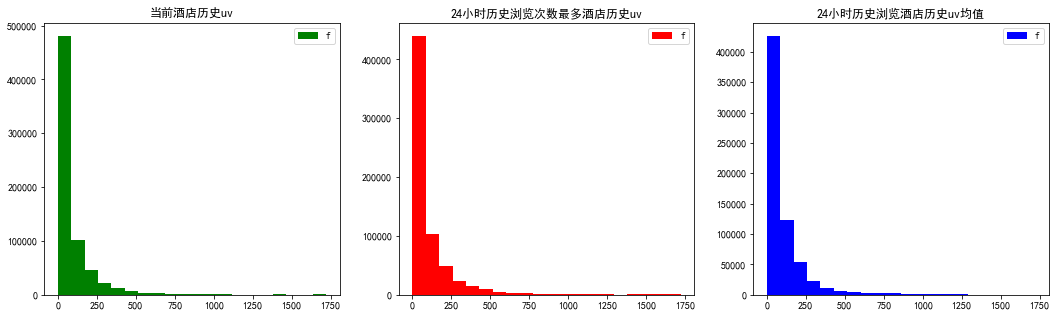

In [30]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df_0['当前酒店历史uv'].dropna(),bins=20,color='g')
plt.title('当前酒店历史uv')
plt.legend('freqency')

plt.subplot(132)
plt.hist(df_0['24小时历史浏览次数最多酒店历史uv'].dropna(),bins=20,color='r')
plt.title('24小时历史浏览次数最多酒店历史uv')
plt.legend('freqency')

plt.subplot(133)
plt.hist(df_0['24小时历史浏览酒店历史uv均值'].dropna(),bins=20,color='b')
plt.title('24小时历史浏览酒店历史uv均值')
plt.legend('freqency')

In [31]:
df_0[['当前酒店历史uv','24小时历史浏览酒店历史uv均值','24小时历史浏览次数最多酒店历史uv']].corr()

,当前酒店历史uv,24小时历史浏览酒店历史uv均值,24小时历史浏览次数最多酒店历史uv
当前酒店历史uv,1.000000,0.695502,0.605905
24小时历史浏览酒店历史uv均值,0.695502,1.000000,0.892931
24小时历史浏览次数最多酒店历史uv,0.605905,0.892931,1.000000


### 客户价值

<Figure size 1296x360 with 0 Axes>

(array([3.89616e+05, 4.74310e+04, 1.59300e+03, 3.04000e+02, 8.40000e+01,
        7.00000e+01, 2.00000e+01, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([-24.075  ,   7.03195,  38.1389 ,  69.24585, 100.3528 , 131.45975,
        162.5667 , 193.67365, 224.7806 , 255.88755, 286.9945 , 318.10145,
        349.2084 , 380.31535, 411.4223 , 442.52925, 473.6362 , 504.74315,
        535.8501 , 566.95705, 598.064  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '客户近1年价值')

(array([7.80000e+01, 4.27522e+05, 1.50400e+04, 1.82600e+03, 4.10000e+02,
        1.49000e+02, 6.30000e+01, 2.80000e+01, 3.90000e+01, 7.00000e+00,
        1.80000e+01, 2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([-44.313  , -12.05635,  20.2003 ,  52.45695,  84.7136 , 116.97025,
        149.2269 , 181.48355, 213.7402 , 245.99685, 278.2535 , 310.51015,
        342.7668 , 375.02345, 407.2801 , 439.53675, 471.7934 , 504.05005,
        536.3067 , 568.56335, 600.82   ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '客户价值')

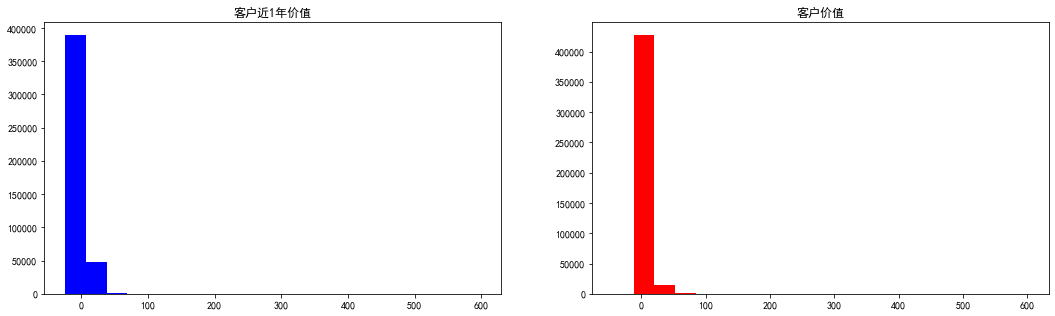

In [32]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['客户价值_近1年'].dropna(),bins=20,color='b')
plt.title('客户近1年价值')

plt.subplot(122)
plt.hist(df_0['客户价值'].dropna(),bins=20,color='r')
plt.title('客户价值')

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, '客户近1年价值')

Text(0.5, 1.0, '客户价值')

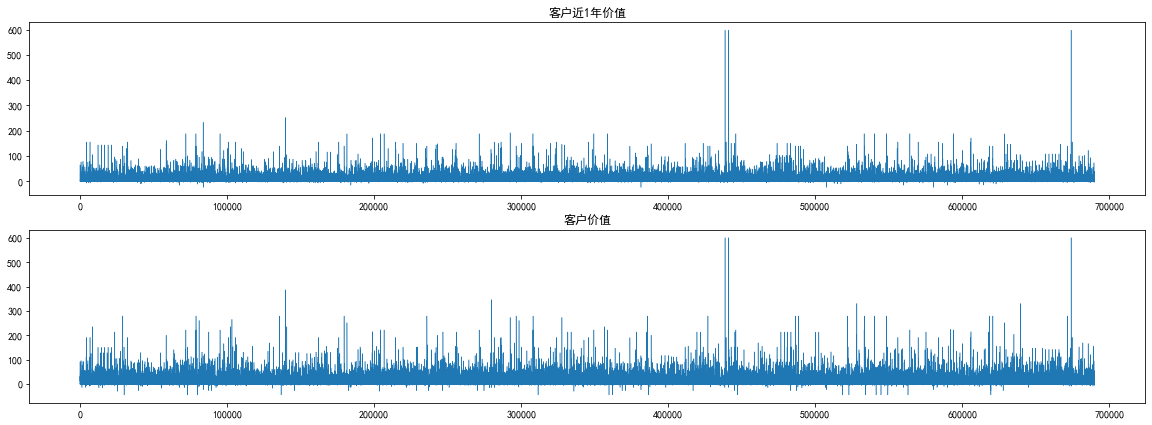

In [33]:
plt.figure(figsize=(20, 7))

plt.subplot(211)
plt.plot(df_0['客户价值_近1年'].dropna(),linewidth=0.5)
plt.title('客户近1年价值')

plt.subplot(212)
plt.plot(df_0['客户价值'].dropna(),linewidth=0.5)
plt.title('客户价值')

In [34]:
df_0[['客户价值_近1年','客户价值']].corr()

,客户价值_近1年,客户价值
客户价值_近1年,1.000000,0.853066
客户价值,0.853066,1.000000


In [35]:
# 存在高相关字段

### 历史订单数

<Figure size 1296x360 with 0 Axes>

(array([3.60967e+05, 1.97710e+04, 4.14000e+03, 9.64000e+02, 4.17000e+02,
        1.18000e+02, 9.10000e+01, 2.70000e+01, 2.00000e+01, 4.00000e+00,
        0.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  1. ,  36.5,  72. , 107.5, 143. , 178.5, 214. , 249.5, 285. ,
        320.5, 356. , 391.5, 427. , 462.5, 498. , 533.5, 569. , 604.5,
        640. , 675.5, 711. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '近1年用户历史订单数')

(array([4.18598e+05, 2.25980e+04, 4.80300e+03, 1.06000e+03, 4.66000e+02,
        1.37000e+02, 9.10000e+01, 4.70000e+01, 2.10000e+01, 4.00000e+00,
        0.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  1. ,  36.5,  72. , 107.5, 143. , 178.5, 214. , 249.5, 285. ,
        320.5, 356. , 391.5, 427. , 462.5, 498. , 533.5, 569. , 604.5,
        640. , 675.5, 711. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户年订单数')

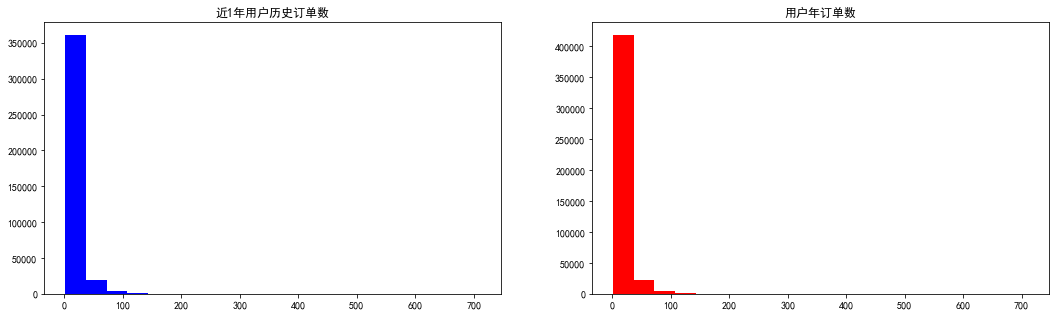

In [36]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['近1年用户历史订单数'].dropna(),bins=20,color='b')
plt.title('近1年用户历史订单数')

plt.subplot(122)
plt.hist(df_0['用户年订单数'].dropna(),bins=20,color='r')
plt.title('用户年订单数')

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, '近1年用户历史订单数')

Text(0.5, 1.0, '用户年订单数')

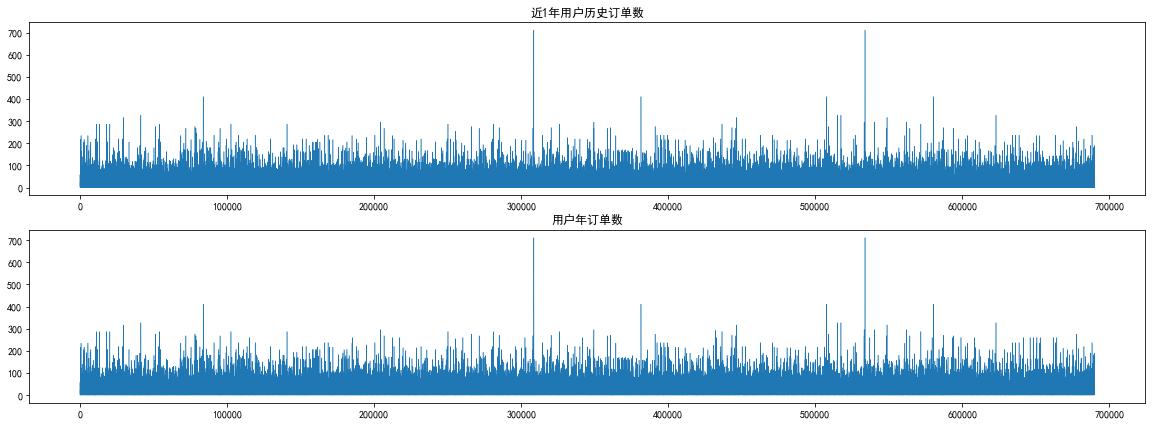

In [37]:
plt.figure(figsize=(20, 7))

plt.subplot(211)
plt.plot(df_0['近1年用户历史订单数'].dropna(),linewidth=0.5)
plt.title('近1年用户历史订单数')

plt.subplot(212)
plt.plot(df_0['用户年订单数'].dropna(),linewidth=0.5)
plt.title('用户年订单数')

In [38]:
df_0[['近1年用户历史订单数','用户年订单数']].corr()

,近1年用户历史订单数,用户年订单数
近1年用户历史订单数,1.0,1.0
用户年订单数,1.0,1.0


In [39]:
# 字段完全正相关，可删除其一

In [40]:
df_0.drop(axis=1,labels='用户年订单数',inplace=True)
df_0.shape

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(689945, 48)

### app uv数

<Figure size 1296x360 with 0 Axes>

(array([333419.,  87887.,  48216.,  44717.,  37196.,  17137.,  17583.,
         11859.,   8554.,   6491.,   4485.,  19102.,      0.,      0.,
             0.,  12456.,  13023.,   9771.,      0.,  10378.]),
 array([7.000000e-03, 3.363650e+00, 6.720300e+00, 1.007695e+01,
        1.343360e+01, 1.679025e+01, 2.014690e+01, 2.350355e+01,
        2.686020e+01, 3.021685e+01, 3.357350e+01, 3.693015e+01,
        4.028680e+01, 4.364345e+01, 4.700010e+01, 5.035675e+01,
        5.371340e+01, 5.707005e+01, 6.042670e+01, 6.378335e+01,
        6.714000e+01]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '昨日访问当前城市同入住日期的app uv数')

(array([340720.,  75308.,  45112.,  36502.,  27302.,  25391.,  15252.,
          9332.,   5951.,   4672.,   2758.,   8923.,   3899.,   4513.,
             0.,   3601.,  17799.,   4767.,   4573.,  14888.]),
 array([7.0000e-03, 7.3200e-01, 1.4570e+00, 2.1820e+00, 2.9070e+00,
        3.6320e+00, 4.3570e+00, 5.0820e+00, 5.8070e+00, 6.5320e+00,
        7.2570e+00, 7.9820e+00, 8.7070e+00, 9.4320e+00, 1.0157e+01,
        1.0882e+01, 1.1607e+01, 1.2332e+01, 1.3057e+01, 1.3782e+01,
        1.4507e+01]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '昨日提交当前城市同入住日期的app订单数')

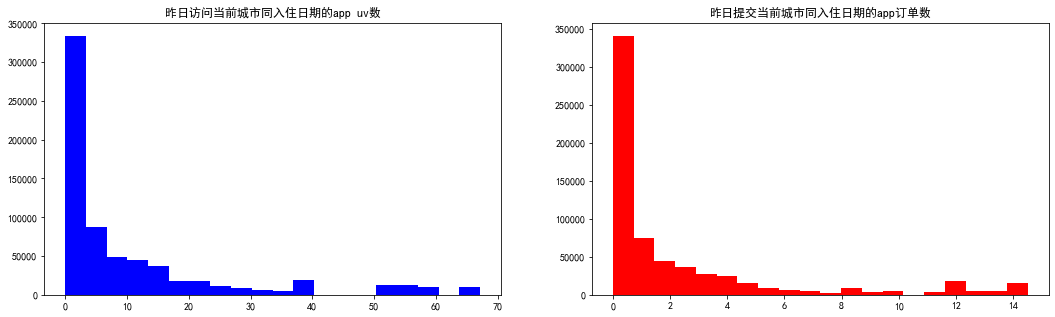

In [41]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['昨日访问当前城市同入住日期的app uv数'].dropna(),bins=20,color='b')
plt.title('昨日访问当前城市同入住日期的app uv数')

plt.subplot(122)
plt.hist(df_0['昨日提交当前城市同入住日期的app订单数'].dropna(),bins=20,color='r')
plt.title('昨日提交当前城市同入住日期的app订单数')

In [42]:
df_0[['昨日访问当前城市同入住日期的app uv数','昨日提交当前城市同入住日期的app订单数']].dropna().corr()

,昨日访问当前城市同入住日期的app uv数,昨日提交当前城市同入住日期的app订单数
昨日访问当前城市同入住日期的app uv数,1.000000,0.988433
昨日提交当前城市同入住日期的app订单数,0.988433,1.000000


In [43]:
df_0.drop(axis=1,labels='昨日提交当前城市同入住日期的app订单数',inplace=True)
df_0.shape

(689945, 47)

### 消费能力指数vs价格敏感指数

<Figure size 1296x360 with 0 Axes>

(array([ 1625.,   298.,   761.,  1617.,  5975., 10616., 15616., 17217.,
        19439., 20750., 19146., 20618., 20186., 20199., 20850., 18763.,
        18886., 16870., 16779., 16046., 13647., 12886., 12355., 11430.,
        10541.,  9177.,  8443.,  7885.,  6848.,  7258.,  5856.,  5538.,
         5162.,  4920.,  4783.,  4277.,  3508.,  3073.,  3028.,  3113.,
         2446.,  2488.,  2245.,  2070.,  2215.,  1624.,  1575.,  1493.,
         1344., 20352.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

Text(0.5, 1.0, '消费能力指数')

(array([77534., 18510., 20862., 22338., 22417., 22469., 21692., 20930.,
        19566., 18123., 15680., 14579., 13390., 11923., 10681.,  9268.,
         8586.,  7458.,  7026.,  6423.,  5832.,  5398.,  4824.,  4947.,
         4233.,  3909.,  3413.,  3238.,  2989.,  2817.,  2621.,  2525.,
         2202.,  2071.,  1909.,  2038.,  1628.,  1440.,  1384.,  1244.,
         1366.,  1133.,  1221.,   929.,  1123.,   818.,   852.,  1006.,
          913., 24359.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

Text(0.5, 1.0, '价格敏感指数')

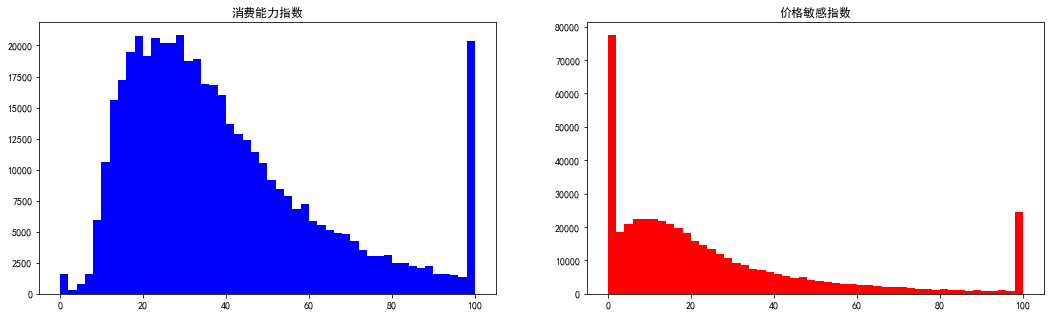

In [44]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['消费能力指数'].dropna(),bins=50,color='b')
plt.title('消费能力指数')

plt.subplot(122)
plt.hist(df_0['价格敏感指数'].dropna(),bins=50,color='r')
plt.title('价格敏感指数')

In [45]:
df_0[['消费能力指数','价格敏感指数']].dropna().corr()

,消费能力指数,价格敏感指数
消费能力指数,1.00000,0.24586
价格敏感指数,0.24586,1.00000


In [46]:
df_0['消费能力指数'].isnull().sum()
df_0['价格敏感指数'].isnull().sum()

226108

226108

In [47]:
# 相关性较弱，单缺失数据一致，可能有隐含相关性？

### 更多用户消费水平指示

In [48]:
df_0[['消费能力指数','价格敏感指数','星级偏好','用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格']].dropna().corr()

,消费能力指数,价格敏感指数,星级偏好,用户偏好价格-24小时浏览最多酒店价格,用户偏好价格-24小时浏览酒店平均价格
消费能力指数,1.000000,0.247858,0.717766,0.251789,0.334961
价格敏感指数,0.247858,1.000000,0.036265,0.095876,0.124588
星级偏好,0.717766,0.036265,1.000000,0.156521,0.209895
用户偏好价格-24小时浏览最多酒店价格,0.251789,0.095876,0.156521,1.000000,0.778976
用户偏好价格-24小时浏览酒店平均价格,0.334961,0.124588,0.209895,0.778976,1.000000


#### 消费能力指数vs星级偏好

<Figure size 864x576 with 0 Axes>

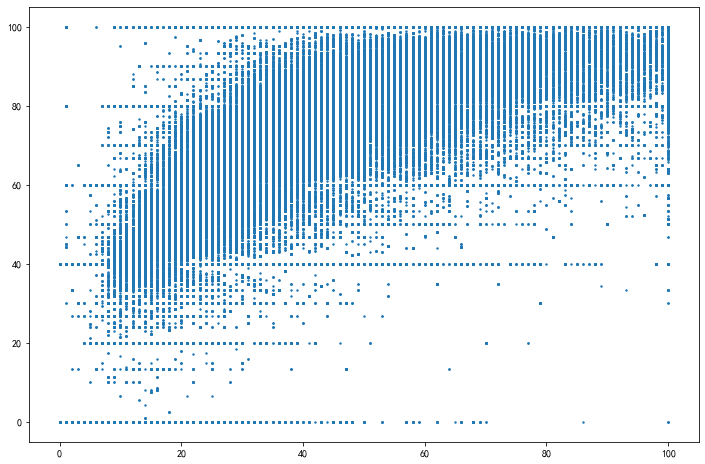

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['消费能力指数'],df_0['星级偏好'],s=2)

In [50]:
# 星级偏好与消费能力指数之间具有强相关，且大致呈线性关系

#### 用户偏好价格：24小时浏览酒店价格vs平均价格

<Figure size 1296x360 with 0 Axes>

(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+00, 0.00000e+00, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        7.00000e+00, 2.20000e+01, 1.51000e+02, 2.67351e+05, 1.69600e+05]),
 array([-99879.  , -94615.15, -89351.3 , -84087.45, -78823.6 , -73559.75,
        -68295.9 , -63032.05, -57768.2 , -52504.35, -47240.5 , -41976.65,
        -36712.8 , -31448.95, -26185.1 , -20921.25, -15657.4 , -10393.55,
         -5129.7 ,    134.15,   5398.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户偏好价格-24小时浏览最多酒店价格')

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        3.00000e+00, 6.00000e+00, 9.00000e+00, 9.00000e+00, 1.70000e+01,
        1.07000e+02, 7.11000e+02, 3.60509e+05, 7.62700e+04, 9.90000e+01]),
 array([-43344. , -40921.1, -38498.2, -36075.3, -33652.4, -31229.5,
        -28806.6, -26383.7, -23960.8, -21537.9, -19115. , -16692.1,
        -14269.2, -11846.3,  -9423.4,  -7000.5,  -4577.6,  -2154.7,
           268.2,   2691.1,   5114. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户偏好价格-24小时浏览酒店平均价格')

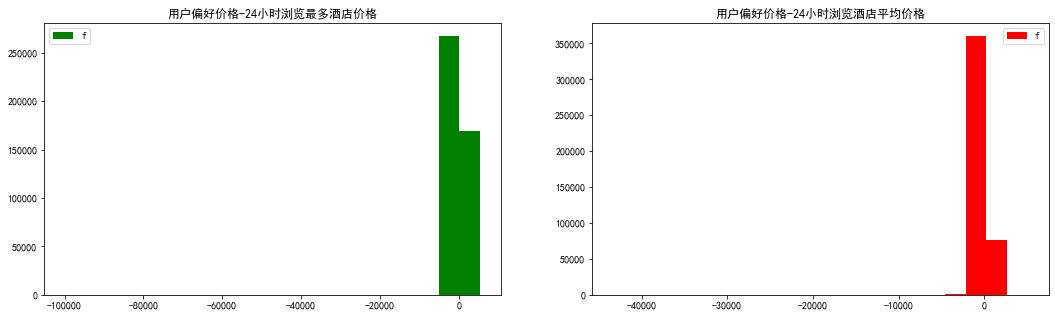

In [51]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['用户偏好价格-24小时浏览最多酒店价格'].dropna(),bins=20,color='g')
plt.title('用户偏好价格-24小时浏览最多酒店价格')
plt.legend('freqency')

plt.subplot(122)
plt.hist(df_0['用户偏好价格-24小时浏览酒店平均价格'].dropna(),bins=20,color='r')
plt.title('用户偏好价格-24小时浏览酒店平均价格')
plt.legend('freqency')

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, '用户偏好价格-24小时浏览最多酒店价格')

Text(0.5, 1.0, '用户偏好价格-24小时浏览酒店平均价格')

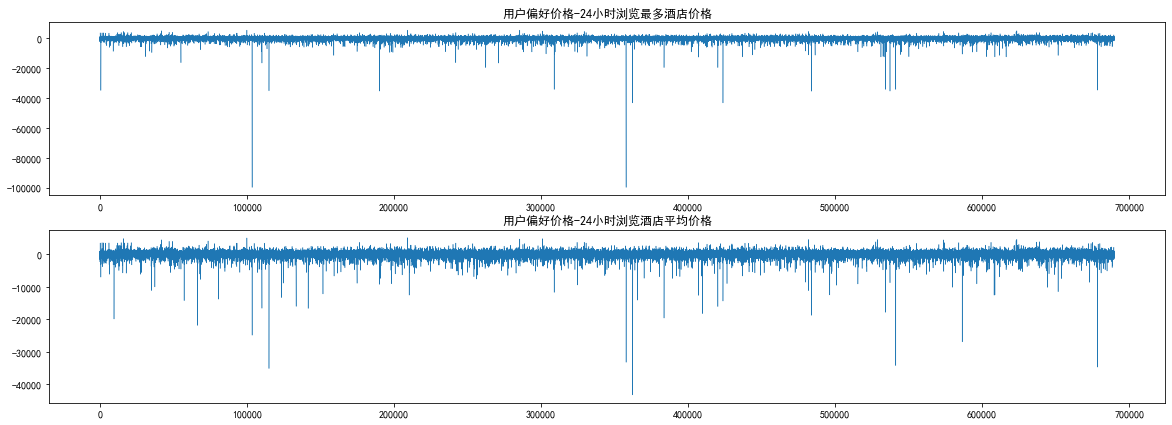

In [52]:
plt.figure(figsize=(20, 7))

plt.subplot(211)
plt.plot(df_0['用户偏好价格-24小时浏览最多酒店价格'].dropna(),linewidth=0.5)
plt.title('用户偏好价格-24小时浏览最多酒店价格')

plt.subplot(212)
plt.plot(df_0['用户偏好价格-24小时浏览酒店平均价格'].dropna(),linewidth=0.5)
plt.title('用户偏好价格-24小时浏览酒店平均价格')

In [53]:
df_0[['用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格']].dropna().corr()

,用户偏好价格-24小时浏览最多酒店价格,用户偏好价格-24小时浏览酒店平均价格
用户偏好价格-24小时浏览最多酒店价格,1.000000,0.781225
用户偏好价格-24小时浏览酒店平均价格,0.781225,1.000000


<Figure size 864x576 with 0 Axes>

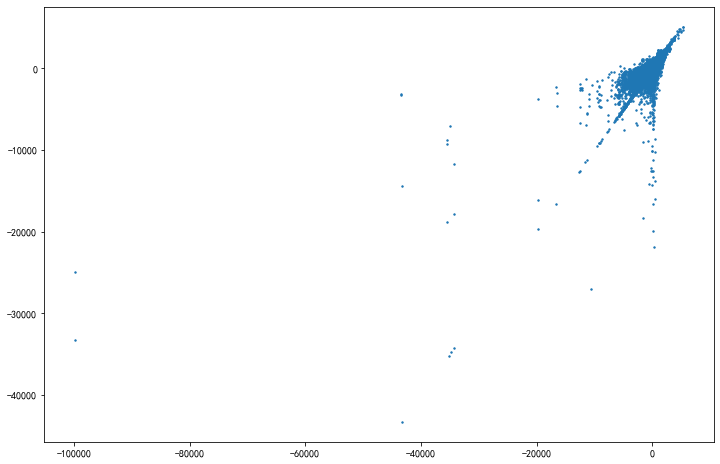

In [54]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['用户偏好价格-24小时浏览最多酒店价格'],df_0['用户偏好价格-24小时浏览酒店平均价格'],s=2)

In [55]:
# 高相关且相关性呈类箭头状，有线性特征

### 酒店价格指标

<Figure size 1296x360 with 0 Axes>

(array([2.01704e+05, 1.82294e+05, 5.03390e+04, 1.44510e+04, 4.99800e+03,
        1.98600e+03, 7.35000e+02, 3.73000e+02, 1.61000e+02, 8.90000e+01,
        2.50000e+01, 6.90000e+01, 9.00000e+00, 1.00000e+00, 1.00000e+01,
        3.00000e+00, 3.00000e+00, 5.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([1.0000e+00, 3.2010e+02, 6.3920e+02, 9.5830e+02, 1.2774e+03,
        1.5965e+03, 1.9156e+03, 2.2347e+03, 2.5538e+03, 2.8729e+03,
        3.1920e+03, 3.5111e+03, 3.8302e+03, 4.1493e+03, 4.4684e+03,
        4.7875e+03, 5.1066e+03, 5.4257e+03, 5.7448e+03, 6.0639e+03,
        6.3830e+03]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '平均价格')

(array([6.87374e+05, 4.39000e+02, 7.60000e+01, 1.30000e+01, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 1.40000e+01, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e+00]),
 array([-3.000000e+00,  4.997150e+03,  9.997300e+03,  1.499745e+04,
         1.999760e+04,  2.499775e+04,  2.999790e+04,  3.499805e+04,
         3.999820e+04,  4.499835e+04,  4.999850e+04,  5.499865e+04,
         5.999880e+04,  6.499895e+04,  6.999910e+04,  7.499925e+04,
         7.999940e+04,  8.499955e+04,  8.999970e+04,  9.499985e+04,
         1.000000e+05]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店可定最低价')

(array([1.00000e+00, 0.00000e+00, 1.03050e+04, 2.05300e+03, 1.33530e+04,
        3.76500e+03, 2.26360e+04, 8.38000e+02, 1.21500e+03, 4.70400e+03,
        7.45300e+03, 9.95930e+04, 2.03851e+05, 0.00000e+00, 3.09000e+02,
        7.86000e+02, 3.41100e+03, 2.40000e+01, 7.50000e+01, 2.62100e+03]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '首单bu')

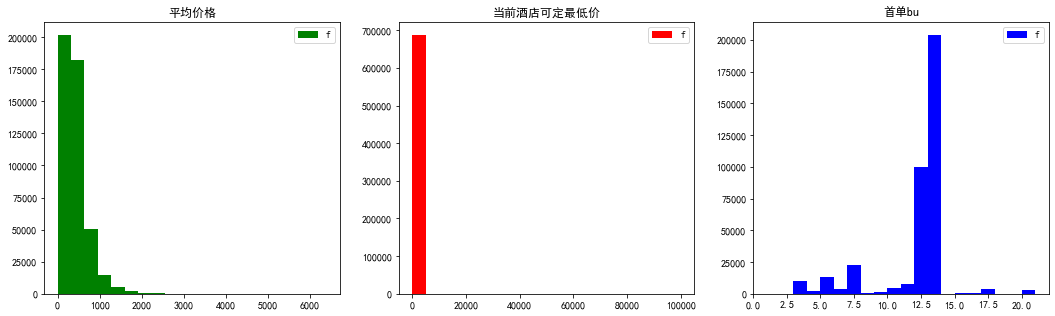

In [56]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df_0['平均价格'].dropna(),bins=20,color='g')
plt.title('平均价格')
plt.legend('freqency')

plt.subplot(132)
plt.hist(df_0['当前酒店可定最低价'].dropna(),bins=20,color='r')
plt.title('当前酒店可定最低价')
plt.legend('freqency')

plt.subplot(133)
plt.hist(df_0['首单bu'].dropna(),bins=20,color='b')
plt.title('首单bu')
plt.legend('freqency')

In [57]:
df_rest1 = df_0[['24小时内是否访问订单填写页',
'决策习惯：以用户为单位观察决策习惯',
'24小时内登陆时长',
'近3个月用户历史日均访问酒店数']]
df_rest1.corr()

,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,24小时内登陆时长,近3个月用户历史日均访问酒店数
24小时内是否访问订单填写页,1.000000,-0.002308,0.225485,-0.002681
决策习惯：以用户为单位观察决策习惯,-0.002308,1.000000,0.005327,0.937761
24小时内登陆时长,0.225485,0.005327,1.000000,0.005882
近3个月用户历史日均访问酒店数,-0.002681,0.937761,0.005882,1.000000


In [58]:
df_rest2 = df_0[['24小时内已访问酒店价格与对手价差均值，t+1',
'24小时内已访问次数最多酒店可订最低价',
'24小时内已访问酒店可订最低价均值',
'24小时内已访问酒店商务属性指数均值',
'24小时内已访问酒店商务属性指数均值']]
df_rest2.corr()

,24小时内已访问酒店价格与对手价差均值，t+1,24小时内已访问次数最多酒店可订最低价,24小时内已访问酒店可订最低价均值,24小时内已访问酒店商务属性指数均值,24小时内已访问酒店商务属性指数均值
24小时内已访问酒店价格与对手价差均值，t+1,1.000000,0.038297,0.052107,0.061082,0.061082
24小时内已访问次数最多酒店可订最低价,0.038297,1.000000,0.767423,-0.094789,-0.094789
24小时内已访问酒店可订最低价均值,0.052107,0.767423,1.000000,-0.137378,-0.137378
24小时内已访问酒店商务属性指数均值,0.061082,-0.094789,-0.137378,1.000000,1.000000
24小时内已访问酒店商务属性指数均值,0.061082,-0.094789,-0.137378,1.000000,1.000000


#### 24小时内已访问次数最多酒店可订最低价vs最低价均值

<Figure size 864x576 with 0 Axes>

[0, 20000, 0, 20000]

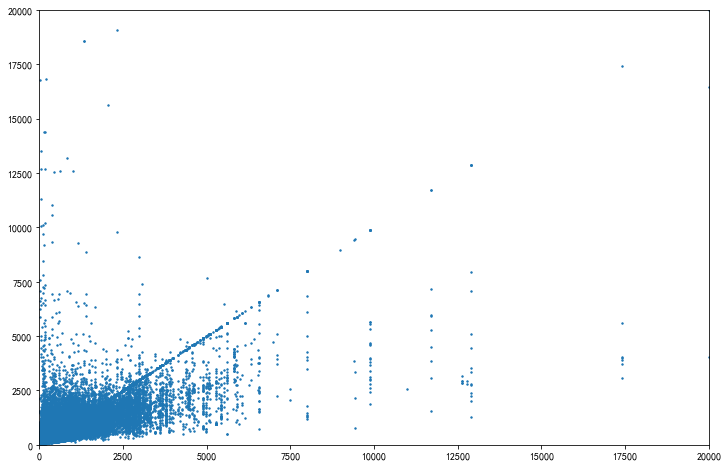

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['24小时内已访问次数最多酒店可订最低价'],df_0['24小时内已访问酒店可订最低价均值'],s=2)
plt.axis([0,20000,0,20000])

In [60]:
# 相关性呈线性特征

## 数据清洗

### 相关信息字段合并

In [61]:
df_0['访问日期']=pd.to_datetime(df_0['访问日期'])
df_0['入住日期']=pd.to_datetime(df_0['入住日期'])
# 生成提前预定时间列
df_0['提前预定天数'] = (df_0['入住日期']-df_0['访问日期']).dt.days
df_0['提前预定天数'] = df_0['提前预定天数'].astype('float')

## 删除列
df_0 = df_0.drop(labels=['访问日期','入住日期'],axis=1)
df_0.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

,目标变量,样本id,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,一年内距上次访问时长,用户转化率,会话id，sid=1可认为是新访,年访问次数,访问时间点,提前预定天数
0,0,24636,0,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,...,615.0,NaN,0.29,12.880,NaN,NaN,7,NaN,12,0.0
1,1,24637,0,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,...,513.0,NaN,0.53,17.933,NaN,NaN,33,NaN,14,0.0
2,0,24641,0,NaN,NaN,1.05,NaN,3.0,NaN,256.0,...,382.0,NaN,0.60,3.993,NaN,NaN,10,NaN,19,1.0
3,0,24642,0,NaN,NaN,1.01,NaN,2.0,NaN,NaN,...,203.0,NaN,0.18,3.220,NaN,NaN,8,NaN,16,0.0
4,1,24644,0,NaN,NaN,1.00,NaN,0.0,NaN,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,1,NaN,21,1.0


### 字段相关性再次筛选

#### 用户行为字段

In [62]:
df_0.columns

Index(['目标变量', '样本id', '24小时内是否访问订单填写页', '决策习惯：以用户为单位观察决策习惯', '近1年用户历史订单数',
       '当前酒店历史cr', '用户一年内取消订单率', '24小时内登陆时长', '用户一年内取消订单数', '当前酒店点评数', '星级偏好',
       '当前酒店评分人数', '消费能力指数', '近3个月用户历史日均访问酒店数', '当前酒店历史取消率',
       '用户偏好价格-24小时浏览最多酒店价格', '价格敏感指数', '当前酒店历史uv', '24小时历史浏览次数最多酒店商务属性指数',
       '24小时历史浏览次数最多酒店历史cr', '平均价格', '当前酒店可定最低价', '首单bu', '24小时历史浏览酒店客户评分均值',
       '用户偏好价格-24小时浏览酒店平均价格', '24小时历史浏览次数最多酒店点评数', '客户价值_近1年',
       '24小时历史浏览酒店点评数均值', '24小时内已访问次数最多酒店历史取消率', '24小时历史浏览酒店评分人数均值',
       '24小时历史浏览次数最多酒店评分人数', '客户价值', '24小时内已访问酒店价格与对手价差均值，t+1',
       '24小时内已访问次数最多酒店可订最低价', '24小时历史浏览次数最多酒店历史uv', '24小时历史浏览酒店历史uv均值',
       '24小时内已访问酒店可订最低价均值', '一年内距离上次下单时长', '24小时内已访问酒店商务属性指数均值',
       '昨日访问当前城市同入住日期的app uv数', '一年内距上次访问时长', '用户转化率', '会话id，sid=1可认为是新访',
       '年访问次数', '访问时间点', '提前预定天数'],
      dtype='object')

In [63]:
df_customerbehavior = df_0[['提前预定天数', '24小时内是否访问订单填写页', 
'决策习惯：以用户为单位观察决策习惯','近1年用户历史订单数',
'用户一年内取消订单率', '24小时内登陆时长', '用户一年内取消订单数',  
'星级偏好','消费能力指数', '近3个月用户历史日均访问酒店数','用户偏好价格-24小时浏览最多酒店价格',
'价格敏感指数','24小时历史浏览酒店客户评分均值', '用户偏好价格-24小时浏览酒店平均价格',
'客户价值_近1年','客户价值','一年内距离上次下单时长', '一年内距上次访问时长', '用户转化率', 
'会话id，sid=1可认为是新访','年访问次数', '访问时间点']]

In [64]:
df_hotelbehavior = df_0[np.setxor1d(df_customerbehavior.columns,df_0.columns)]
df_hotelbehavior.head()

,24小时内已访问次数最多酒店历史取消率,24小时内已访问次数最多酒店可订最低价,24小时内已访问酒店价格与对手价差均值，t+1,24小时内已访问酒店可订最低价均值,24小时内已访问酒店商务属性指数均值,24小时历史浏览次数最多酒店历史cr,24小时历史浏览次数最多酒店历史uv,24小时历史浏览次数最多酒店商务属性指数,24小时历史浏览次数最多酒店点评数,24小时历史浏览次数最多酒店评分人数,...,当前酒店历史cr,当前酒店历史uv,当前酒店历史取消率,当前酒店可定最低价,当前酒店点评数,当前酒店评分人数,昨日访问当前城市同入住日期的app uv数,样本id,目标变量,首单bu
0,0.03,46.0,29.0,615.0,0.29,1.03,58.027,0.25,724.0,1249.0,...,1.04,102.607,1261.0,49.0,1089.0,1933.0,12.880,24636,0,NaN
1,0.21,111.0,-56.0,513.0,0.53,1.07,249.347,0.51,5610.0,7829.0,...,1.06,278.373,3205.0,619.0,5612.0,6852.0,17.933,24637,1,NaN
2,0.52,413.0,8.0,382.0,0.60,1.12,133.093,0.61,4721.0,7324.0,...,1.05,16.133,194.0,312.0,256.0,367.0,3.993,24641,0,NaN
3,0.53,188.0,-7.0,203.0,0.18,1.01,4.600,NaN,41.0,81.0,...,1.01,1.780,3.0,198.0,NaN,NaN,3.220,24642,0,NaN
4,1.00,NaN,-5.0,84.0,NaN,1.03,0.213,NaN,NaN,NaN,...,1.00,0.073,NaN,NaN,NaN,NaN,0.013,24644,1,NaN


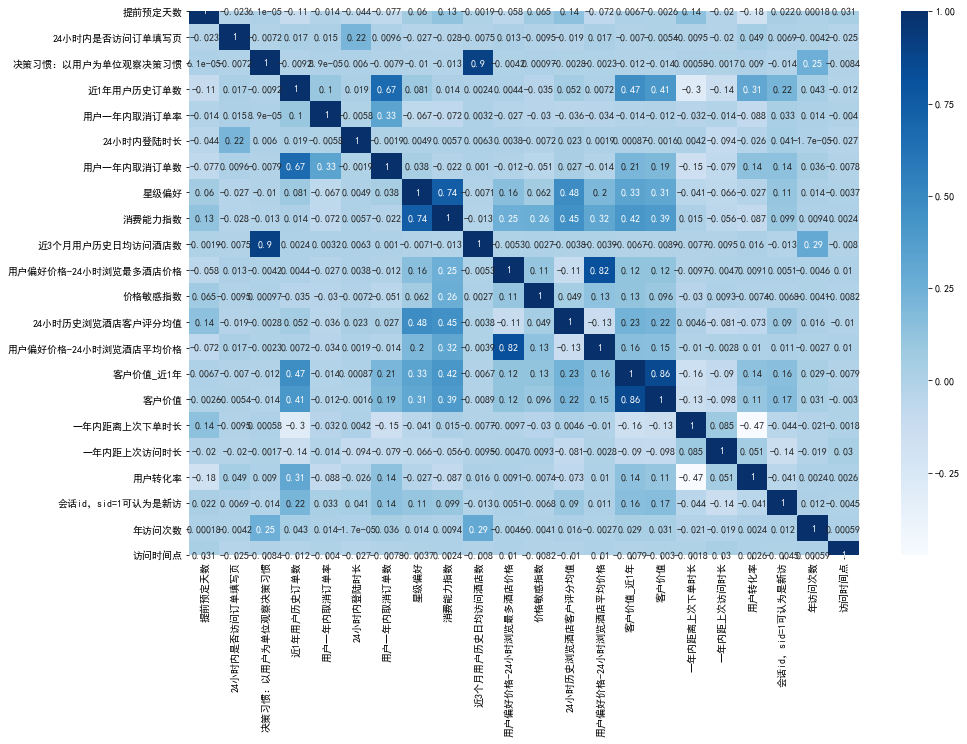

In [65]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_customerbehavior.dropna().corr(),cmap='Blues',annot=True)

#### 酒店行为字段

In [66]:
df_hotelbehavior.columns

Index(['24小时内已访问次数最多酒店历史取消率', '24小时内已访问次数最多酒店可订最低价', '24小时内已访问酒店价格与对手价差均值，t+1',
       '24小时内已访问酒店可订最低价均值', '24小时内已访问酒店商务属性指数均值', '24小时历史浏览次数最多酒店历史cr',
       '24小时历史浏览次数最多酒店历史uv', '24小时历史浏览次数最多酒店商务属性指数', '24小时历史浏览次数最多酒店点评数',
       '24小时历史浏览次数最多酒店评分人数', '24小时历史浏览酒店历史uv均值', '24小时历史浏览酒店点评数均值',
       '24小时历史浏览酒店评分人数均值', '平均价格', '当前酒店历史cr', '当前酒店历史uv', '当前酒店历史取消率',
       '当前酒店可定最低价', '当前酒店点评数', '当前酒店评分人数', '昨日访问当前城市同入住日期的app uv数', '样本id',
       '目标变量', '首单bu'],
      dtype='object')

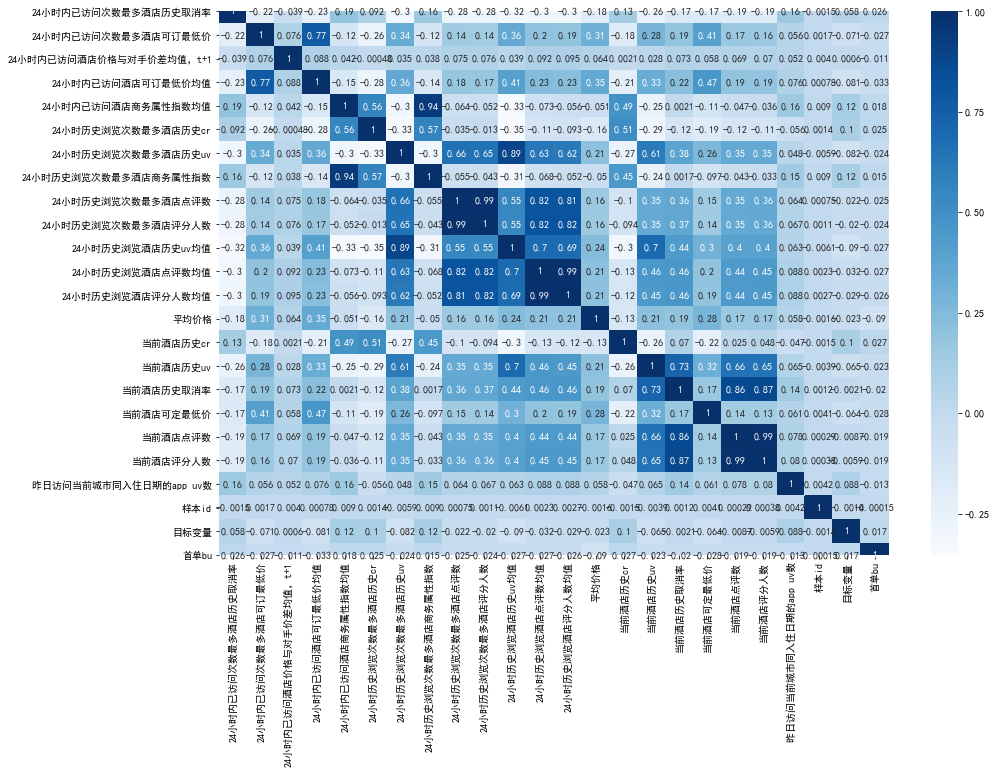

In [67]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_hotelbehavior.dropna().corr(),cmap='Blues',annot=True)

In [68]:
target = df_0.pop('目标变量')

In [69]:
df_0.head()

,样本id,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,星级偏好,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,一年内距上次访问时长,用户转化率,会话id，sid=1可认为是新访,年访问次数,访问时间点,提前预定天数
0,24636,0,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,...,615.0,NaN,0.29,12.880,NaN,NaN,7,NaN,12,0.0
1,24637,0,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,...,513.0,NaN,0.53,17.933,NaN,NaN,33,NaN,14,0.0
2,24641,0,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,...,382.0,NaN,0.60,3.993,NaN,NaN,10,NaN,19,1.0
3,24642,0,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,...,203.0,NaN,0.18,3.220,NaN,NaN,8,NaN,16,0.0
4,24644,0,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,1,NaN,21,1.0


### 缺失值填充

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(df_0,target,test_size=0.3,random_state=100)

##### 以下是尝试用多重插补法进行填充，但是报错了不知道为什么

In [71]:
'''
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.imputation import mice'''

'\nimport statsmodels.api as sm\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nfrom statsmodels.imputation import mice'

In [72]:
'''
imdata = xtrain.copy()
# 拷贝数据
imp = mice.MICEData(imdata)
# 指定数据
imp.update_all(20)
# 指定MICE的迭代次数'''

'\nimdata = xtrain.copy()\n# 拷贝数据\nimp = mice.MICEData(imdata)\n# 指定数据\nimp.update_all(20)\n# 指定MICE的迭代次数'

#### 中位数填充

In [73]:
for col in xtrain.columns:
    xtrain[col]=xtrain[col].fillna(xtrain[col].median())

xtrain.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,样本id,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,星级偏好,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,一年内距上次访问时长,用户转化率,会话id，sid=1可认为是新访,年访问次数,访问时间点,提前预定天数
295636,517380,0,13.0,1.0,1.07,0.00,0.0,0.0,1494.0,80.0,...,410.0,42616.0,0.41,11.927,9258.0,1.20,200,981.0,8,0.0
129861,241292,0,3.0,6.0,1.10,0.25,6.0,2.0,797.0,69.4,...,118.0,46878.0,0.64,17.220,1606.0,1.05,43,562.0,1,0.0
240919,426420,0,3.0,3.0,1.08,0.00,0.0,0.0,550.0,40.0,...,400.0,83890.0,0.55,14.487,2233.0,1.29,945,2149.0,21,0.0
578240,988742,0,3.0,6.0,1.03,0.25,8.0,2.0,1.0,69.4,...,150.0,46878.0,0.19,1.407,2850.0,1.05,4,1315.0,21,6.0
210779,376243,0,4.0,6.0,1.02,0.99,0.0,578.0,96.0,55.0,...,257.0,5956.0,0.02,1.440,138.0,1.13,178,5672.0,16,0.0


In [74]:
for col in xtest.columns:
    xtest[col]=xtest[col].fillna(xtrain[col].median())

xtest.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,样本id,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,星级偏好,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,一年内距上次访问时长,用户转化率,会话id，sid=1可认为是新访,年访问次数,访问时间点,提前预定天数
508124,871985,0,2.0,63.0,1.03,0.10,0.0,211.0,1265.0,96.8,...,1682.0,14954.0,0.39,8.367,14543.0,1.33,75,2888.0,13,1.0
395004,683400,0,2.0,10.0,1.05,0.33,0.0,99.0,2575.0,67.5,...,1072.0,3092.0,0.18,7.640,10.0,1.03,469,17864.0,11,1.0
92847,179634,0,1.0,2.0,1.08,0.06,0.0,1.0,437.0,60.0,...,183.0,23291.0,0.40,21.680,263.0,1.33,38,202.0,13,1.0
482783,829877,1,6.0,3.0,1.05,0.33,0.0,1.0,1321.0,60.0,...,181.0,179994.0,0.39,2.853,5001.0,1.00,99,2637.0,22,2.0
217237,386813,0,1.0,49.0,1.04,0.38,0.0,717.0,514.0,65.7,...,108.0,51054.0,0.40,2.000,383.0,1.55,81,5571.0,15,0.0


### 极值处理

#### 先处理训练集

In [75]:
max_value_before = []
for col in xtrain.columns:
    mv = xtrain[col].max()
    max_value_before.append(mv)

print(max_value_before)

[2238425, 1, 3167.0, 711.0, 3.18, 1.0, 49.0, 13475.0, 34189.0, 100.0, 45455.0, 100.0, 3167.0, 18930.0, 5398.0, 100.0, 1722.6129999999998, 0.99, 2.95, 6383.0, 100000.0, 21.0, 6.0, 5042.0, 34189.0, 598.064, 34189.0, 1.0, 45436.0, 45436.0, 600.82, 3324.0, 100000.0, 1722.6129999999998, 1722.6129999999998, 43700.0, 527026.0, 0.99, 67.14, 194386.0, 11.0, 9956, 9651192.0, 23, 30.0]


In [76]:
for col in xtrain.columns:    
    
    percent1=np.percentile(xtrain[col],1)       # 该列的1%分位数
    percent99=np.percentile(xtrain[col],99)       # 该列的99%分位数

    xtrain.loc[xtrain[col]<percent1,col]=percent1    # 小于1%分位数的，用1%分位数填充
    xtrain.loc[xtrain[col]>percent99,col]=percent99    # 大于99%分位数的，用99%分位数填充00

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sy

In [77]:
max_value_after = []
for col in xtrain.columns:
    mv = xtrain[col].max()
    max_value_after.append(mv)

print(max_value_after)

[2226865.6, 1.0, 22.0, 67.0, 1.19, 1.0, 48.0, 1497.0, 8232.0, 100.0, 11549.0, 100.0, 24.0, 6337.0, 920.0, 100.0, 964.113, 0.79, 1.19, 1359.0, 1820.0, 15.0, 5.5, 869.0, 9443.0, 23.272, 7234.400000000023, 1.0, 9797.800000000047, 13365.0, 33.029000000000934, 97.0, 1684.4000000000233, 994.8599999999999, 846.953, 1439.0, 465804.0, 0.77, 66.007, 134469.0, 2.0, 1213.0, 180874.0, 23.0, 27.0]


#### 再用训练集的分位数处理测试集

In [78]:
for col in xtest.columns:
    
    percent1=np.percentile(xtrain[col],1)       # 该列的1%分位数
    percent99=np.percentile(xtrain[col],99)       # 该列的99%分位数
    
    xtest.loc[xtest[col]<percent1,col]=percent1    # 小于1%分位数的，用1%分位数填充
    xtest.loc[xtest[col]>percent99,col]=percent99    # 大于99%分位数的，用99%分位数填充00

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### PCA降维

#### 训练集降维

In [79]:
pca_1 = PCA(n_components=1,random_state=66)
pca_2 = PCA(n_components=1,random_state=66)
pca_3 = PCA(n_components=1,random_state=66)
pca_4 = PCA(n_components=1,random_state=66)
pca_5 = PCA(n_components=1,random_state=66)
pca_6 = PCA(n_components=1,random_state=66)

y1 = np.array(xtrain[['决策习惯：以用户为单位观察决策习惯','近3个月用户历史日均访问酒店数']])
y2 = np.array(xtrain[['用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格']])
y3 = np.array(xtrain[['客户价值_近1年','客户价值']])
y4 = np.array(xtrain[['24小时内已访问酒店商务属性指数均值','24小时历史浏览次数最多酒店商务属性指数']])
y5 = np.array(xtrain[['24小时历史浏览次数最多酒店历史uv','24小时历史浏览酒店历史uv均值']])
y6 = np.array(xtrain[['24小时历史浏览次数最多酒店点评数','24小时历史浏览酒店点评数均值']])

决策行为 = pca_1.fit_transform(y1)
用户偏好价格 = pca_2.fit_transform(y2)
客户价值 = pca_3.fit_transform(y3)
浏览酒店商务属性 = pca_4.fit_transform(y4)
浏览酒店历史uv = pca_5.fit_transform(y5)
访问过的酒店点评数 = pca_6.fit_transform(y6)

xtrain.drop(axis=1,labels=['决策习惯：以用户为单位观察决策习惯','近3个月用户历史日均访问酒店数',
                         '用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格',
                         '客户价值_近1年','客户价值',
                         '24小时内已访问酒店商务属性指数均值','24小时历史浏览次数最多酒店商务属性指数',
                         '24小时历史浏览次数最多酒店历史uv','24小时历史浏览酒店历史uv均值',
                         '24小时历史浏览次数最多酒店点评数','24小时历史浏览酒店点评数均值'],inplace=True)

xtrain['决策行为'] = 决策行为
xtrain['用户偏好价格'] = 用户偏好价格
xtrain['客户价值'] = 客户价值
xtrain['浏览酒店商务属性'] = 浏览酒店商务属性
xtrain['浏览酒店历史uv'] = 浏览酒店历史uv
xtrain['访问过的酒店点评数'] = 访问过的酒店点评数

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anac

#### 测试集降维

In [80]:
pca_1_test = PCA(n_components=1,random_state=66)
pca_2_test = PCA(n_components=1,random_state=66)
pca_3_test = PCA(n_components=1,random_state=66)
pca_4_test = PCA(n_components=1,random_state=66)
pca_5_test = PCA(n_components=1,random_state=66)
pca_6_test = PCA(n_components=1,random_state=66)

y1_test = np.array(xtest[['决策习惯：以用户为单位观察决策习惯','近3个月用户历史日均访问酒店数']])
y2_test = np.array(xtest[['用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格']])
y3_test = np.array(xtest[['客户价值_近1年','客户价值']])
y4_test = np.array(xtest[['24小时内已访问酒店商务属性指数均值','24小时历史浏览次数最多酒店商务属性指数']])
y5_test = np.array(xtest[['24小时历史浏览次数最多酒店历史uv','24小时历史浏览酒店历史uv均值']])
y6_test = np.array(xtest[['24小时历史浏览次数最多酒店点评数','24小时历史浏览酒店点评数均值']])

决策行为_test = pca_1.fit_transform(y1_test)
用户偏好价格_test = pca_2.fit_transform(y2_test)
客户价值_test = pca_3.fit_transform(y3_test)
浏览酒店商务属性_test = pca_4.fit_transform(y4_test)
浏览酒店历史uv_test = pca_5.fit_transform(y5_test)
访问过的酒店点评数_test = pca_6.fit_transform(y6_test)

xtest.drop(axis=1,labels=['决策习惯：以用户为单位观察决策习惯','近3个月用户历史日均访问酒店数',
                         '用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格',
                         '客户价值_近1年','客户价值',
                         '24小时内已访问酒店商务属性指数均值','24小时历史浏览次数最多酒店商务属性指数',
                         '24小时历史浏览次数最多酒店历史uv','24小时历史浏览酒店历史uv均值',
                         '24小时历史浏览次数最多酒店点评数','24小时历史浏览酒店点评数均值'],inplace=True)

xtest['决策行为'] = 决策行为_test
xtest['用户偏好价格'] = 用户偏好价格_test
xtest['客户价值'] = 客户价值_test
xtest['浏览酒店商务属性'] = 浏览酒店商务属性_test
xtest['浏览酒店历史uv'] = 浏览酒店历史uv_test
xtest['访问过的酒店点评数'] = 访问过的酒店点评数_test

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anac

In [81]:
xtrain.shape
xtest.shape

(482961, 39)

(206984, 39)

### 对自变量进行标准化

In [82]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [83]:
train_columns = list(xtrain.columns)
test_columns = list(xtest.columns)

std = std.fit(xtrain)
xtrain = pd.DataFrame(std.transform(xtrain))
xtrain.columns = train_columns

xtest = pd.DataFrame(std.transform(xtest))
xtest.columns = test_columns

In [84]:
xtrain.head()

,样本id,24小时内是否访问订单填写页,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,星级偏好,当前酒店评分人数,...,会话id，sid=1可认为是新访,年访问次数,访问时间点,提前预定天数,决策行为,用户偏好价格,客户价值,浏览酒店商务属性,浏览酒店历史uv,访问过的酒店点评数
0,-0.268022,-0.489416,-0.733909,0.223440,-1.072947,-0.478012,-0.368700,0.222111,0.769059,0.291417,...,0.253813,-0.186352,-1.027127,-0.554408,2.562052,0.639966,-0.524791,-0.271007,0.675182,1.883974
1,-0.934504,-0.489416,-0.269580,0.931551,-0.207588,0.013968,-0.360740,-0.217675,0.070938,-0.169292,...,-0.480017,-0.207580,-2.138667,-0.554408,-0.229219,0.031099,-0.512305,0.752835,-0.511850,-0.541693
2,-0.487601,-0.489416,-0.548177,0.459477,-1.072947,-0.478012,-0.368700,-0.373524,-1.865361,-0.079212,...,3.736000,-0.127179,1.037163,-0.554408,-0.229219,1.637280,-0.471057,1.065705,0.350807,0.615365
3,0.869854,-0.489416,-0.269580,-0.720708,-0.207588,0.177961,-0.360740,-0.719927,0.070938,-0.688711,...,-0.662306,-0.169431,1.037163,0.345178,-0.229219,0.031099,-0.321416,-0.459991,-0.461276,-0.782747
4,-0.608730,-0.489416,-0.269580,-0.956745,2.353874,-0.478012,1.931804,-0.659985,-0.877453,-0.655547,...,0.150984,0.051304,0.243206,-0.554408,0.785861,0.423744,-0.486124,-1.852312,-0.440185,-0.332768


### 用决策树模型获得最优字段排序

In [85]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=100,class_weight="balanced")
clf = clf.fit(xtrain,ytrain)

In [86]:
clf.feature_importances_

array([0.01585449, 0.01361016, 0.01987925, 0.01043774, 0.01628437,
       0.01861726, 0.01867005, 0.00769631, 0.02576758, 0.00837138,
       0.01865285, 0.00961604, 0.02608338, 0.01131353, 0.01817387,
       0.02509929, 0.01321317, 0.01102579, 0.02096148, 0.0247042 ,
       0.01998531, 0.0201136 , 0.02044211, 0.0230751 , 0.02330327,
       0.03836383, 0.0508174 , 0.04723886, 0.05756933, 0.04970298,
       0.05607643, 0.0462875 , 0.04631168, 0.03046751, 0.01533224,
       0.04092564, 0.03852089, 0.02398832, 0.0174458 ])

In [87]:
feature_result = pd.DataFrame({'feature':list(xtrain.columns),
                              'importance':clf.feature_importances_}) 

feature_result = feature_result.sort_values('importance',ascending=False).reset_index(drop=True)

feature_result

,feature,importance
0,用户转化率,0.057569
1,年访问次数,0.056076
2,昨日访问当前城市同入住日期的app uv数,0.050817
3,会话id，sid=1可认为是新访,0.049703
4,一年内距上次访问时长,0.047239
5,提前预定天数,0.046312
6,访问时间点,0.046288
7,客户价值,0.040926
8,浏览酒店商务属性,0.038521
9,一年内距离上次下单时长,0.038364


In [88]:
clf.score(xtest,ytest)

0.8487660882000541

In [89]:
# 取前20个，有待商榷

In [90]:
ind = list(feature_result['feature'][:30])
xtrain_reduced = xtrain[ind]
xtest_reduced = xtest[ind]

##### 字段重要性差距较小，试过后证明，摒弃部分排名靠后的字段后，模型效果会变差
##### 因此选择保留所有字段

## 建模与评估

### XGBoost

In [92]:
import xgboost as xgb

In [ ]:
# 数据类型转换
dtrain = xgb.DMatrix(xtrain,ytrain)
dtest = xgb.DMatrix(xtest)

# 设置参数
params={'booster':'gbtree',
        'objective': 'binary:logistic', # 二分类
        'eval_metric': 'auc',
        'max_depth':8,
        'gamma':0,
        'lambda':2,
        'subsample':0.7,
        'colsample_bytree':0.8,
        'min_child_weight':3,
        'eta': 0.2,
        'nthread':8, # 调用CPU的线程数
        'silent':1} # 开启静默模式

# 观测每次迭代的模型的评估分数
watchlist = [(dtrain,'train')]

# 训练模型
bst = xgb.train(params,dtrain,num_boost_round=500,evals=watchlist)
ypred = bst.predict(dtest)  # 预测分数

# 设置阈值，输出标签取值
y_pred = (ypred>=0.5)*1

from sklearn import metrics
print('AUC: %.4f'% metrics.roc_auc_score(ytest,y_pred))  # 预测分数
print('ACC: %.4f'% metrics.accuracy_score(ytest,y_pred))  # 使用预测标签
print('Recall: %.4f'% metrics.recall_score(ytest,y_pred))
print('F1-score: %.4f'% metrics.f1_score(ytest,y_pred))
print('precision: %.4f'% metrics.precision_score(ytest,y_pred))
metrics.confusion_matrix(ytest,y_pred)

In [ ]:
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(ytest,ypred)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)                             # AUC得分
score_xgb = metrics.accuracy_score(ytest,y_pred)                  # 模型准确率
print([score_xgb,auc_xgb])

##### 模型recall与precision差距较大，证明原有样本均衡性有待提高

### 重采样减少样本不均衡

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
over_samples = SMOTE(random_state=100,ratio='auto',out_step='0.5',kind='regular')

In [95]:
over_samples

SMOTE(k_neighbors=5, kind='regular', m_neighbors='deprecated', n_jobs=1,
      out_step='0.5', random_state=100, ratio='auto', sampling_strategy='auto',
      svm_estimator='deprecated')

In [96]:
over_samples_x,over_samples_y = over_samples.fit_sample(xtrain,ytrain)
over_x_test,over_y_test = over_samples.fit_sample(xtest,ytest)

In [100]:
ytrain.value_counts()/len(ytrain)
pd.Series(over_samples_y).value_counts()/len(over_samples_y)

0    0.724887
1    0.275113
Name: 目标变量, dtype: float64

1    0.5
0    0.5
dtype: float64

### 重采样后的XGBoost模型

In [102]:
# 数据类型转换
dtrain = xgb.DMatrix(over_samples_x,over_samples_y)
dtest = xgb.DMatrix(over_x_test)

# 设置参数
params={'booster':'gbtree',
        'objective': 'binary:logistic', # 二分类
        'eval_metric': 'auc',
        'max_depth':8,
        'gamma':0,
        'lambda':2,
        'subsample':0.7,
        'colsample_bytree':0.8,
        'min_child_weight':3,
        'eta': 0.2,
        'nthread':8, # 调用CPU的线程数
        'silent':1} # 开启静默模式

# 观测每次迭代的模型的评估分数
watchlist = [(dtrain,'train')]

# 训练模型
bst = xgb.train(params,dtrain,num_boost_round=500,evals=watchlist)
ypred1 = bst.predict(dtest)  # 预测分数

# 设置阈值，输出标签取值
y_pred1 = (ypred1>=0.5)*1

from sklearn import metrics
print('AUC: %.4f'% metrics.roc_auc_score(over_y_test,y_pred1))  # 预测分数
print('ACC: %.4f'% metrics.accuracy_score(over_y_test,y_pred1))  # 使用预测标签
print('Recall: %.4f'% metrics.recall_score(over_y_test,y_pred1))
print('F1-score: %.4f'% metrics.f1_score(over_y_test,y_pred1))
print('precision: %.4f'% metrics.precision_score(over_y_test,y_pred1))
metrics.confusion_matrix(over_y_test,y_pred1)

[0]	train-auc:0.767068
[1]	train-auc:0.812384
[2]	train-auc:0.825041
[3]	train-auc:0.829056
[4]	train-auc:0.836203
[5]	train-auc:0.83995
[6]	train-auc:0.842892
[7]	train-auc:0.850126
[8]	train-auc:0.857143
[9]	train-auc:0.863635
[10]	train-auc:0.865481
[11]	train-auc:0.866814
[12]	train-auc:0.869048
[13]	train-auc:0.872121
[14]	train-auc:0.873679
[15]	train-auc:0.876284
[16]	train-auc:0.878135
[17]	train-auc:0.880814
[18]	train-auc:0.882028
[19]	train-auc:0.88375
[20]	train-auc:0.885368
[21]	train-auc:0.887101
[22]	train-auc:0.888833
[23]	train-auc:0.890684
[24]	train-auc:0.892011
[25]	train-auc:0.89385
[26]	train-auc:0.895138
[27]	train-auc:0.896034
[28]	train-auc:0.897518
[29]	train-auc:0.898924
[30]	train-auc:0.899668
[31]	train-auc:0.903608
[32]	train-auc:0.904099
[33]	train-auc:0.904509
[34]	train-auc:0.905002
[35]	train-auc:0.906321
[36]	train-auc:0.906873
[37]	train-auc:0.908844
[38]	train-auc:0.90999
[39]	train-auc:0.911015
[40]	train-auc:0.911204
[41]	train-auc:0.912229
[42]	t

[334]	train-auc:0.980976
[335]	train-auc:0.981032
[336]	train-auc:0.98108
[337]	train-auc:0.981201
[338]	train-auc:0.981276
[339]	train-auc:0.981394
[340]	train-auc:0.981458
[341]	train-auc:0.98156
[342]	train-auc:0.981646
[343]	train-auc:0.981688
[344]	train-auc:0.981784
[345]	train-auc:0.981824
[346]	train-auc:0.981911
[347]	train-auc:0.981967
[348]	train-auc:0.982007
[349]	train-auc:0.982071
[350]	train-auc:0.982172
[351]	train-auc:0.982248
[352]	train-auc:0.9823
[353]	train-auc:0.982391
[354]	train-auc:0.982485
[355]	train-auc:0.982561
[356]	train-auc:0.982654
[357]	train-auc:0.982707
[358]	train-auc:0.982787
[359]	train-auc:0.982855
[360]	train-auc:0.982918
[361]	train-auc:0.982974
[362]	train-auc:0.983045
[363]	train-auc:0.983083
[364]	train-auc:0.983172
[365]	train-auc:0.983203
[366]	train-auc:0.983261
[367]	train-auc:0.983345
[368]	train-auc:0.983422
[369]	train-auc:0.983517
[370]	train-auc:0.983605
[371]	train-auc:0.98365
[372]	train-auc:0.983684
[373]	train-auc:0.983775
[374]

array([[143346,   7150],
       [ 19628, 130868]], dtype=int64)

In [108]:
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(over_y_test,y_pred1)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)                             # AUC得分
score_xgb = metrics.accuracy_score(over_y_test,y_pred1)                  # 模型准确率
print([score_xgb,auc_xgb])

[0.9110341803104401, 0.91103418031044]


In [129]:
from sklearn.metrics import classification_report
print(classification_report(over_y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91    150496
           1       0.95      0.87      0.91    150496

    accuracy                           0.91    300992
   macro avg       0.91      0.91      0.91    300992
weighted avg       0.91      0.91      0.91    300992



### 网格搜索-最优决策树

In [109]:
from sklearn.model_selection import GridSearchCV

In [114]:
# 设置参数网格
param = {'criterion':['entropy','gini'],'max_depth':range(2,5),'min_samples_split':range(2,10,2),'min_samples_leaf':range(1,5)}
from sklearn import tree
gsv = GridSearchCV(tree.DecisionTreeClassifier(),param,cv=3)
# 建模
gsv.fit(over_samples_x,over_samples_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 5),
                         '

In [115]:
# 最优参数取值下的最高分数
gsv.best_score_

0.6484409812277916

In [116]:
# 最优参数组合
gsv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [118]:
clf = DecisionTreeClassifier(random_state=100,criterion='entropy',max_depth=4,min_samples_leaf=1,min_samples_split=2,class_weight="balanced")
clf = clf.fit(over_samples_x,over_samples_y)

In [119]:
clf.score(over_x_test,over_y_test)

0.6629245960025516

In [126]:
clf_y_pred = clf.predict(over_x_test)

In [127]:
fpr_clf,tpr_clf,threshold_clf = metrics.roc_curve(over_y_test,clf_y_pred)

In [130]:
print(classification_report(over_y_test,clf_y_pred))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65    150496
           1       0.65      0.70      0.67    150496

    accuracy                           0.66    300992
   macro avg       0.66      0.66      0.66    300992
weighted avg       0.66      0.66      0.66    300992



### 随机森林

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier()                                     # 建立随机森林分类器
rfc.fit(over_samples_x,over_samples_y)                             # 训练随机森林模型
rf_y_prob = rfc.predict_proba(over_x_test)[:,1]                       # 预测1类的概率
rf_y_pred=rfc.predict(over_x_test)                                    # 模型对测试集的预测结果
fpr_rfc,tpr_rfc,threshold_rfc = metrics.roc_curve(over_y_test,rf_y_prob)   # 获取真阳率、伪阳率、阈值  
auc_rfc = metrics.auc(fpr_rfc,tpr_rfc)                             # AUC得分
score_rfc = metrics.accuracy_score(over_y_test,rf_y_pred)                  # 模型准确率
print([score_rfc,auc_rfc])

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[0.8734218849670423, 0.9473914333010643]


In [132]:
print(classification_report(over_y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88    150496
           1       0.93      0.81      0.86    150496

    accuracy                           0.87    300992
   macro avg       0.88      0.87      0.87    300992
weighted avg       0.88      0.87      0.87    300992



## 模型比较

<function matplotlib.pyplot.show(*args, **kw)>

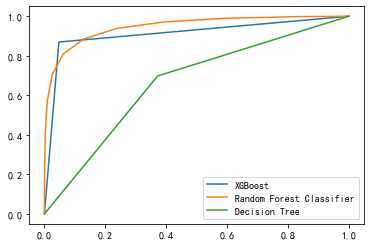

In [128]:
plt.plot(fpr_xgb,tpr_xgb,label='XGBoost')
plt.plot(fpr_rfc,tpr_rfc,label='Random Forest Classifier')
plt.plot(fpr_clf,tpr_clf,label='Decision Tree')
plt.legend(loc='lower right')
plt.show